In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
import re
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import os
from nltk import word_tokenize, sent_tokenize, ngrams
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud


Mounted at /content/drive


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#cargar textos dede drive
file_path1 = '/content/drive/My Drive/PYCD_DCCF/we sould all be feminists.docx'
file_path2 = '/content/drive/My Drive/PYCD_DCCF/The danger of a single story.docx'
file_path3 = '/content/drive/My Drive/PYCD_DCCF/dear_ijeawele.docx'

In [4]:
STOP_WORDS = set(stopwords.words('english'))

In [5]:
import os

file_path1 = '/content/drive/My Drive/PYCD_DCCF/we should all be feminists.docx'

if os.path.exists(file_path1):
    print("El archivo existe.")
else:
    print("El archivo NO existe.")

El archivo existe.


In [6]:
!pip install python-docx
from docx import Document
import re
# Función para leer y limpiar texto de un archivo .docx
def read_and_clean_docx(file_path):
    doc = Document(file_path)
    text = "\n".join([para.text for para in doc.paragraphs])
    # Limpiar el texto
    text = re.sub(r'\s+', ' ', text)  # Eliminar saltos de línea y espacios adicionales
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
    text = text.lower()  # Convertir a minúsculas
    return text

# Leer y limpiar cada archivo
text1_clean = read_and_clean_docx(file_path1)
text2_clean = read_and_clean_docx(file_path2)
text3_clean = read_and_clean_docx(file_path3)

# Imprimir los textos limpios
print(text1_clean)
print(text2_clean)
print(text3_clean)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.8 MB/s eta 0:00:00
we should all be feminists my brother chuks and my best friend ike are part of the organizing team so when they ask me to come i couldnt say no but im so happy to be here what a fantastic team of people who care about africa i feel so humble and so happy to be here and im also told that the most beautiful most amazing little girl in the world is in the audience her name is kamzia adichie and i want her to stand up shes my niece applause so i would like to start by telling you about one of my greatest friend okuloma okuloma lived on my street and looked after me like a big brother if i liked a boy i would ask okulomas opinion okuloma died in the notorious sosoliso plane crash in nigeria in december of 2005 almost exactly seven years ago okuloma was a person i could argue with laugh with and truly talk to he was also the first person to call me a feminist i was about fourteen we were at his house arguing both

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

# Cargar el modelo de idioma inglés
nlp = spacy.load('en_core_web_sm')

# Función para procesar el texto, tokenizar y eliminar stopwords
def clean_tokenize_remove_stopwords_spacy(text):
    # Procesar el texto con spaCy
    doc = nlp(text)
    # Filtrar tokens que no sean stopwords, puntuación o espacios
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return tokens

# Aplicar la función a cada texto limpio
tokens1_clean_spacy = clean_tokenize_remove_stopwords_spacy(text1_clean)
tokens2_clean_spacy = clean_tokenize_remove_stopwords_spacy(text2_clean)
tokens3_clean_spacy = clean_tokenize_remove_stopwords_spacy(text3_clean)

# Imprimir todos los tokens de cada texto
print("Tokens from We should all be feminists :")
print(tokens1_clean_spacy)

print("\nTokens from The danger of a single story:")
print(tokens2_clean_spacy)

print("\nTokens from Dear Ijeawele:")
print(tokens3_clean_spacy)


Tokens from We should all be feminists :
['feminists', 'brother', 'chuks', 'best', 'friend', 'ike', 'organizing', 'team', 'ask', 'come', 'nt', 'm', 'happy', 'fantastic', 'team', 'people', 'care', 'africa', 'feel', 'humble', 'happy', 'm', 'told', 'beautiful', 'amazing', 'little', 'girl', 'world', 'audience', 'kamzia', 'adichie', 'want', 'stand', 's', 'niece', 'applause', 'like', 'start', 'telling', 'greatest', 'friend', 'okuloma', 'okuloma', 'lived', 'street', 'looked', 'like', 'big', 'brother', 'liked', 'boy', 'ask', 'okulomas', 'opinion', 'okuloma', 'died', 'notorious', 'sosoliso', 'plane', 'crash', 'nigeria', 'december', '2005', 'exactly', 'seven', 'years', 'ago', 'okuloma', 'person', 'argue', 'laugh', 'truly', 'talk', 'person', 'feminist', 'fourteen', 'house', 'arguing', 'bristling', 'halfbit', 'knowledge', 'books', 'read', 'nt', 'remember', 'particular', 'argument', 'remember', 'argued', 'argued', 'okuloma', 'looked', 'said', 'know', 'feminist', 'compliment', 'laughter', 'tell', 't

In [9]:
from collections import Counter
import numpy as np

# Función para calcular estadísticas descriptivas básicas
def text_statistics_spacy(tokens):
    # Número total de tokens
    total_tokens = len(tokens)

    # Número de tokens únicos
    unique_tokens = len(set(tokens))

    # Promedio de longitud de las palabras
    word_lengths = [len(token) for token in tokens]
    avg_word_length = np.mean(word_lengths)

    # Contar las oraciones
    doc = nlp(" ".join(tokens))  # Procesar el texto con spaCy para contar oraciones
    num_sentences = len(list(doc.sents))

    # Frecuencia de las palabras más comunes
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(10)  # Las 10 palabras más comunes

    # Devolver las estadísticas
    return {
        'total_tokens': total_tokens,
        'unique_tokens': unique_tokens,
        'avg_word_length': avg_word_length,
        'num_sentences': num_sentences,
        'common_words': common_words
    }

# Calcular las estadísticas para cada texto
stats1 = text_statistics_spacy(tokens1_clean_spacy)
stats2 = text_statistics_spacy(tokens2_clean_spacy)
stats3 = text_statistics_spacy(tokens3_clean_spacy)

# Imprimir las estadísticas de cada texto
print("Statistics for the first document:")
print(stats1)

print("\nStatistics for the second document:")
print(stats2)

print("\nStatistics for the third document:")
print(stats3)

Statistics for the first document:
{'total_tokens': 1839, 'unique_tokens': 844, 'avg_word_length': 5.979336595976074, 'num_sentences': 5, 'common_words': [('man', 41), ('men', 33), ('nt', 28), ('women', 28), ('laughter', 22), ('woman', 22), ('feminist', 21), ('gender', 21), ('know', 19), ('girls', 14)]}

Statistics for the second document:
{'total_tokens': 1185, 'unique_tokens': 676, 'avg_word_length': 6.411814345991561, 'num_sentences': 2, 'common_words': [('story', 29), ('stories', 24), ('people', 21), ('single', 18), ('african', 15), ('read', 14), ('like', 12), ('roommate', 10), ('africa', 10), ('think', 9)]}

Statistics for the third document:
{'total_tokens': 3944, 'unique_tokens': 1675, 'avg_word_length': 6.235040567951319, 'num_sentences': 9, 'common_words': [('women', 76), ('men', 46), ('teach', 44), ('like', 39), ('nt', 39), ('know', 29), ('people', 28), ('woman', 25), ('tell', 25), ('world', 25)]}


In [10]:
from collections import Counter

# Función para generar n-gramas
def get_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Función para calcular los bigramas más frecuentes
def get_most_frequent_ngrams(tokens, n=2, top_n=10):
    ngrams = get_ngrams(tokens, n)
    ngram_freq = Counter(ngrams)
    return ngram_freq.most_common(top_n)

# Calcular los bigramas más frecuentes para cada texto
bigram_freq1 = get_most_frequent_ngrams(tokens1_clean_spacy, n=2, top_n=10)
bigram_freq2 = get_most_frequent_ngrams(tokens2_clean_spacy, n=2, top_n=10)
bigram_freq3 = get_most_frequent_ngrams(tokens3_clean_spacy, n=2, top_n=10)

# Imprimir
print("Most frequent bigrams in We should all be feminists:")
print(bigram_freq1)

print("\nMost frequent bigrams in The danger of a single story:")
print(bigram_freq2)

print("\nMost frequent bigrams in Dear Ijeawele:")
print(bigram_freq3)

Most frequent bigrams in We should all be feminists:
[('class monitor', 5), ('years ago', 4), ('word feminist', 4), ('men women', 4), ('physically stronger', 4), ('teach girls', 4), ('laughter applause', 4), ('grow women', 4), ('sort thing', 3), ('highest score', 3)]

Most frequent bigrams in The danger of a single story:
[('single story', 18), ('roommate knew', 7), ('ginger beer', 4), ('fides family', 4), ('people like', 3), ('write sequel', 3), ('tell stories', 3), ('danger single', 2), ('poor mother', 2), ('snow ate', 2)]

Most frequent bigrams in Dear Ijeawele:
[('men women', 9), ('feminism lite', 8), ('gender roles', 7), ('suggestion teach', 6), ('baby girl', 5), ('domestic work', 5), ('tell people', 5), ('teach question', 5), ('single mother', 4), ('teach chizalum', 4)]


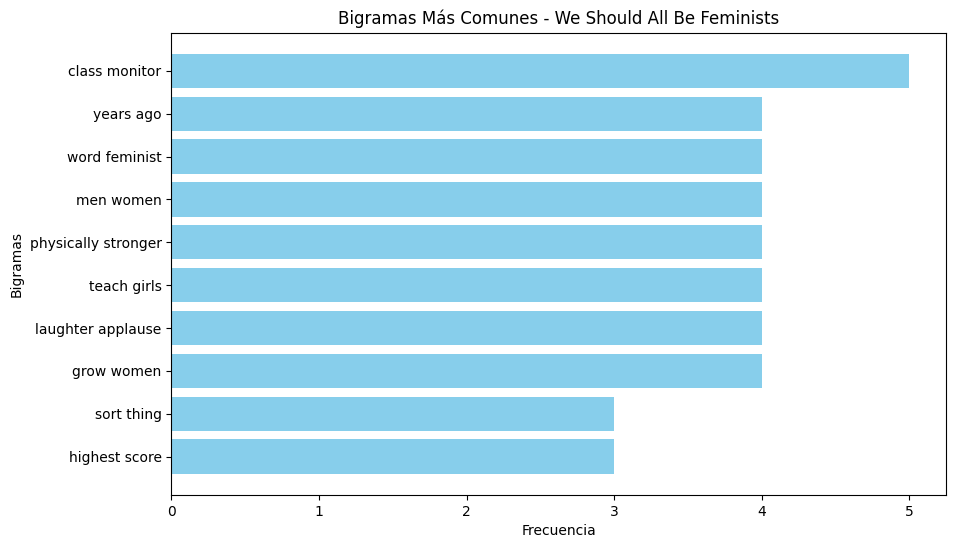

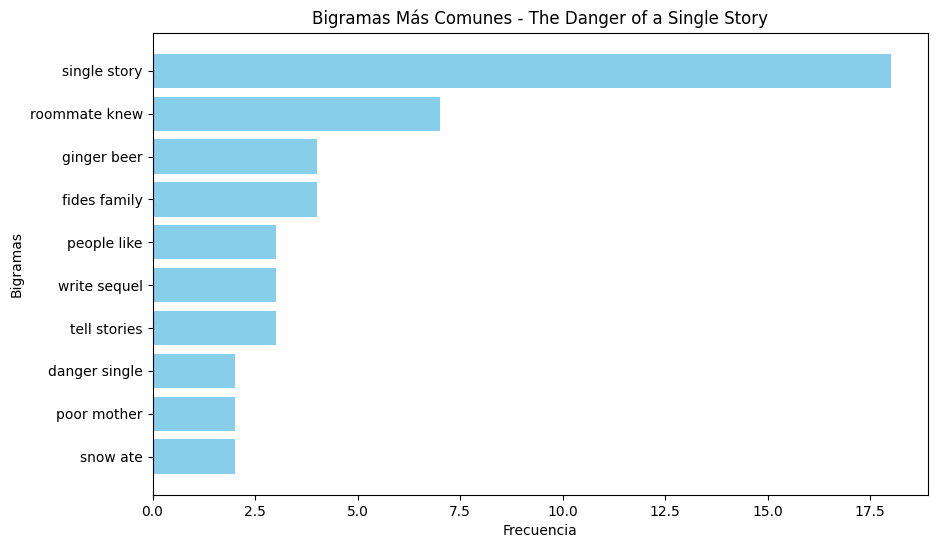

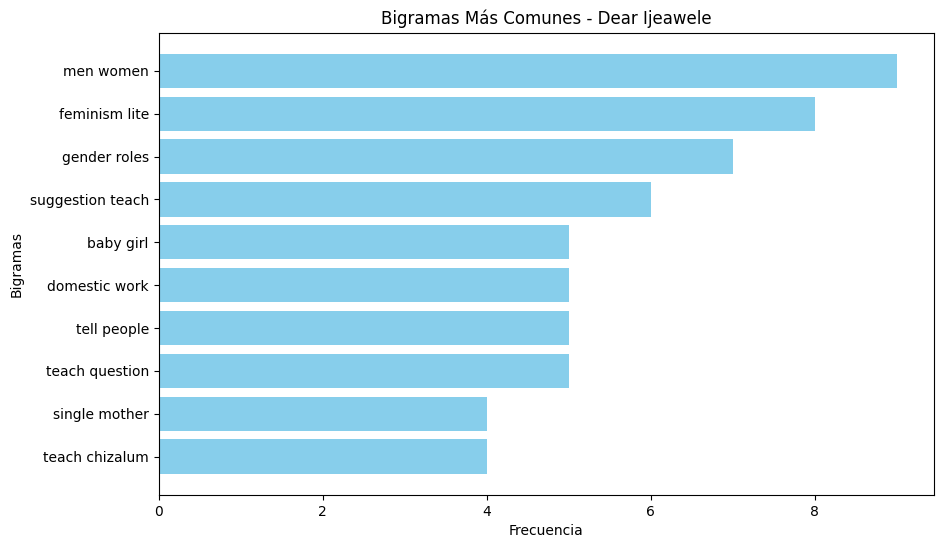

In [11]:
import matplotlib.pyplot as plt

# Función para graficar bigramas
def plot_bigrams(bigram_freq, title):
    bigram_labels, bigram_values = zip(*bigram_freq)  # Separar etiquetas y valores

    plt.figure(figsize=(10, 6))
    plt.barh(bigram_labels, bigram_values, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Bigramas')
    plt.title(title)
    plt.gca().invert_yaxis()  # Para que el bigrama más frecuente aparezca arriba
    plt.show()

# Graficar los bigramas de cada libro
plot_bigrams(bigram_freq1, 'Bigramas Más Comunes - We Should All Be Feminists')
plot_bigrams(bigram_freq2, 'Bigramas Más Comunes - The Danger of a Single Story')
plot_bigrams(bigram_freq3, 'Bigramas Más Comunes - Dear Ijeawele')


WordCloud for We should all be feminists:


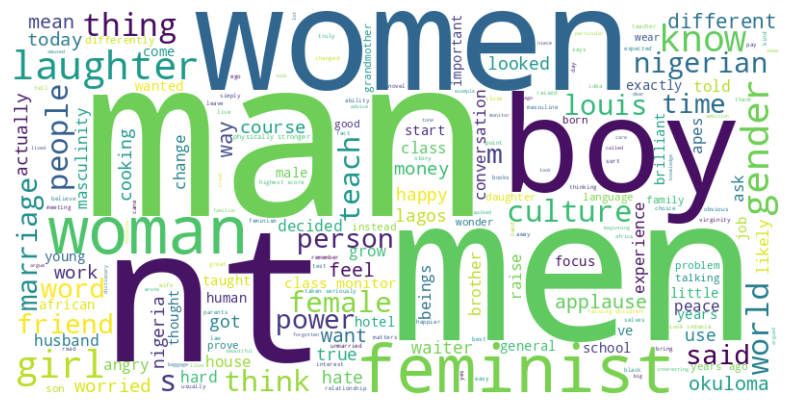

WordCloud for The danger of a single story:


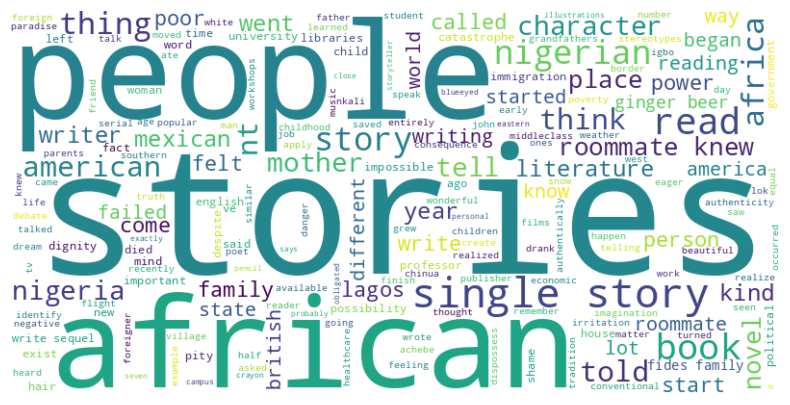

WordCloud for Dear Ijeawele:


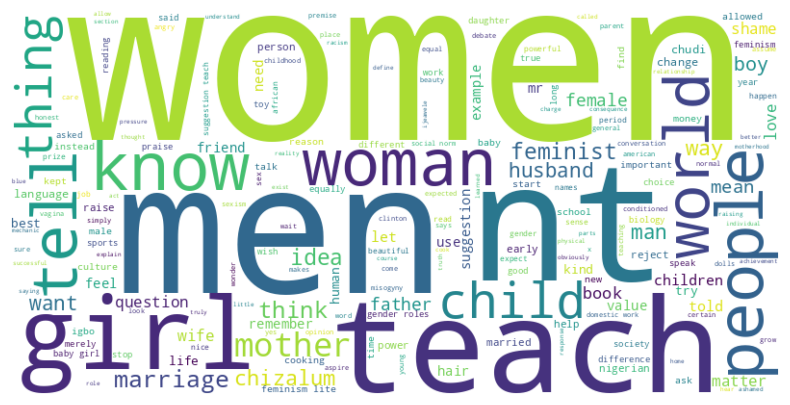

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para crear y mostrar la wordcloud
def create_wordcloud(tokens):
    # Unir todos los tokens en una cadena de texto
    text = " ".join(tokens)

    # Crear la WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Crear y mostrar la wordcloud para cada texto
print("WordCloud for We should all be feminists:")
create_wordcloud(tokens1_clean_spacy)

print("WordCloud for The danger of a single story:")
create_wordcloud(tokens2_clean_spacy)

print("WordCloud for Dear Ijeawele:")
create_wordcloud(tokens3_clean_spacy)

Most common words in We should all be feminists:


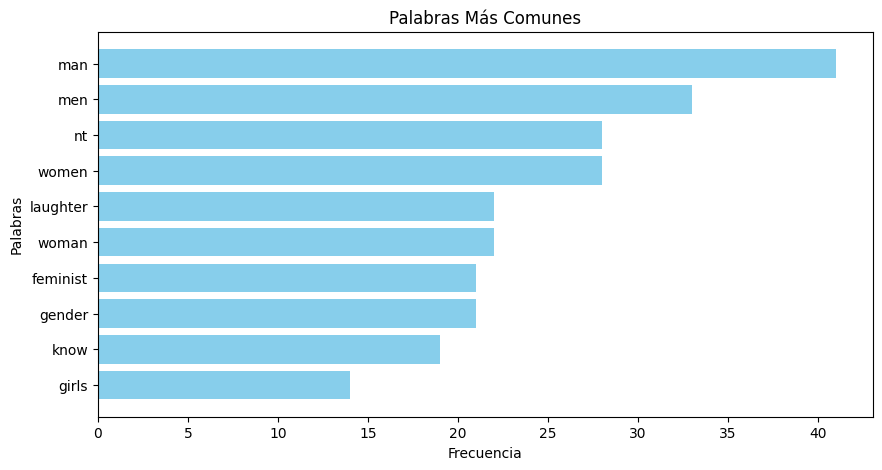

Most common words in The danger of a single story:


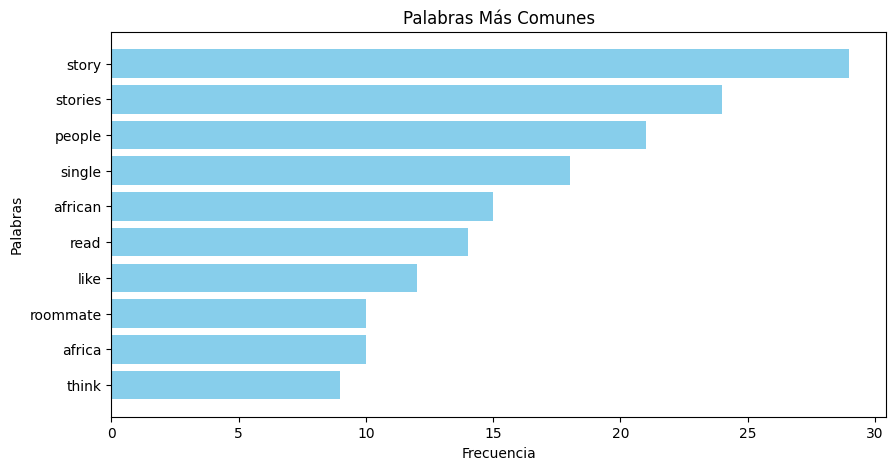

Most common words in Dear Ijeawele:


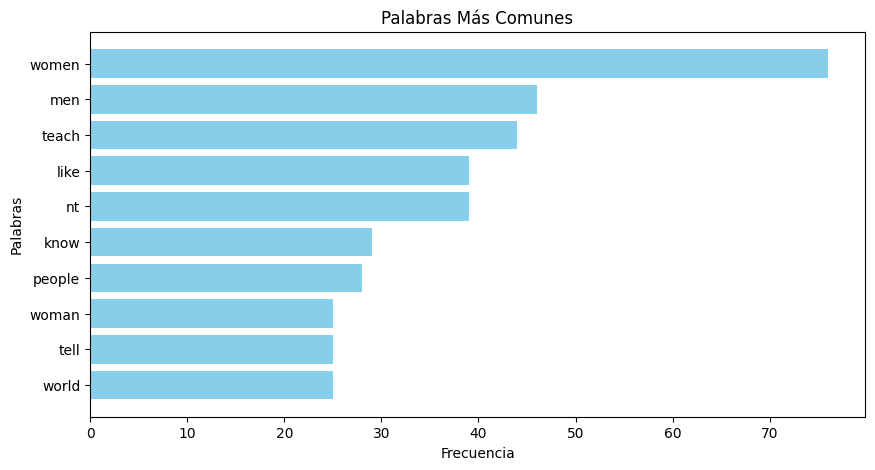

In [13]:
# Función para contar las palabras más comunes
def plot_most_common_words(tokens, top_n=10):
    # Contar la frecuencia de las palabras
    word_freq = Counter(tokens)

    # Obtener las n palabras más comunes
    most_common_words = word_freq.most_common(top_n)

    # Separar las palabras y sus frecuencias
    words, frequencies = zip(*most_common_words)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 5))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.title('Palabras Más Comunes')
    plt.gca().invert_yaxis()  # Para que las palabras más frecuentes aparezcan arriba
    plt.show()

# Graficar las palabras más comunes para cada texto
print("Most common words in We should all be feminists:")
plot_most_common_words(tokens1_clean_spacy, top_n=10)

print("Most common words in The danger of a single story:")
plot_most_common_words(tokens2_clean_spacy, top_n=10)

print("Most common words in Dear Ijeawele:")
plot_most_common_words(tokens3_clean_spacy, top_n=10)
